# Estudio e Investigación de la API Premium de Twitter (Sandbox)

por Álvaro Bartolomé del Canto (alvarob96@usal.es)

---

La **API Premium de Twitter** nos permite a acceder a tweets que forman parte del histórico de tweets desde el primer tweet publicado allá en 2006, hasta la actualidad; lo cual a través de la versión Básica de la API no podemos acceder, ya que está sujeta a una serie de limitaciones que tan solo permiten recuperar información de los últimos 7 a 9 días, por tanto, la única forma de recuperar una gran cantidad de tweets se realizará a través de un Streaming.

## Generación de Claves de *Twitter API Premium* y el *Development Environment*

Por tanto, para la generación de las claves de la **API de Twitter** (*CONSUMER KEY, CONSUMER SECRET, ACCESS TOKEN, ACCESS TOKEN SECRET*) será necesario crear una aplicación en https://developer.twitter.com/ con permisos de Read-Only.

Tras crear la aplicación, tendremos que crear un "*Development Environment*" en https://developer.twitter.com/en/account/environments. Durante la creación del mismo, el sistema solicitará el nombre de la etiqueta a utilizar por el "*Development Environment*", que será la que identificará la URL del endpoint de la forma: "https://api.twitter.com/1.1/tweets/search/fullarchive/" + LABEL + ".json"

</br>

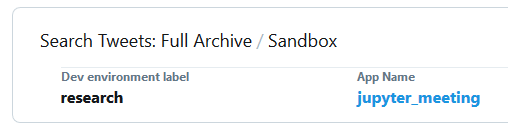

In [2]:
from IPython.display import Image
Image(filename='resources/dev_environment.png') 

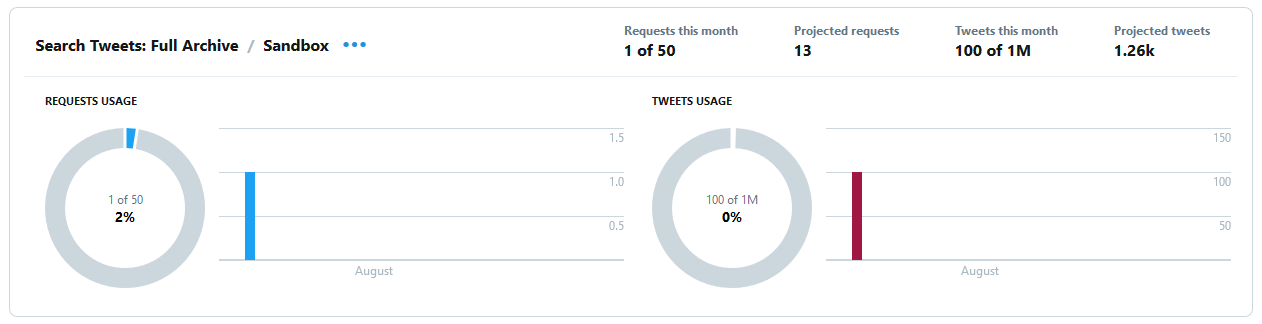

In [3]:
from IPython.display import Image
Image(filename='resources/premium_dashboard.png') 

De este modo la *API Premium de Twitter* nos permitirá recuperar de hasta 5000 tweets al mes en la versión *Sandbox*, hasta 50000 en el plan de pago más barato ofertado por *Twitter*.


## Construcción de la Petición a la *API Premium de Twitter*

Distinguimos así dos variantes de la *API Premium de Twitter*, las cuales han de ser contratadas de forma independiente, siendo la primera y la deseada en este caso, la **API Premium Full Archive**, que nos permite recuperar tweets directamente del histórico de tweets con complejas queries y una amplia gama de parámetros de personalización de la búsqueda; que será igual para la **API Premium 30 Day**, con la excepción de que esta recupera todos los tweets publicados en una ventana temporal de 30 días. Por tanto, una de las principales ventajas de la *API Premium* es que proporciona 500 resultados (tweets) por llamada, mientras que la version gratuita tan solo proporcionaba 100; y que permite queries más complejas y con franjas temporales superiores a 7 días, pudiendo establecer el rango de fechas específico entre el que recuperar dichos *tweets*.



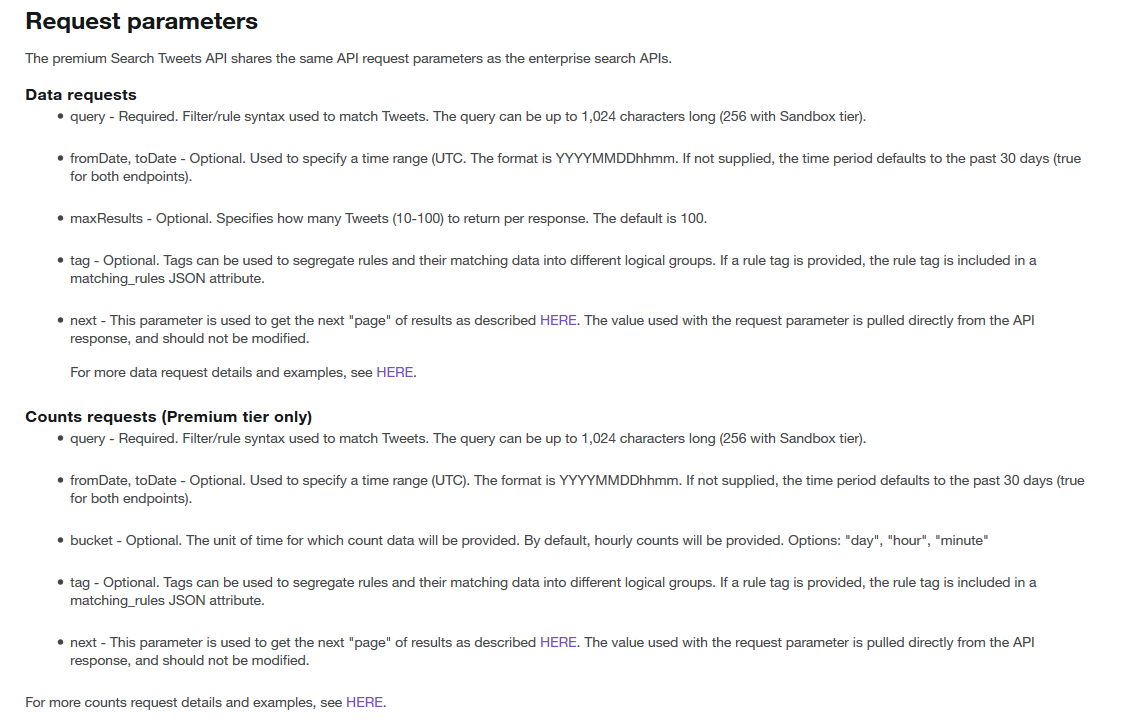

In [50]:
from IPython.display import Image
Image(filename='resources/request_parameters.png') 

## Limitaciones de Peticiones a la *API Premium de Twitter*

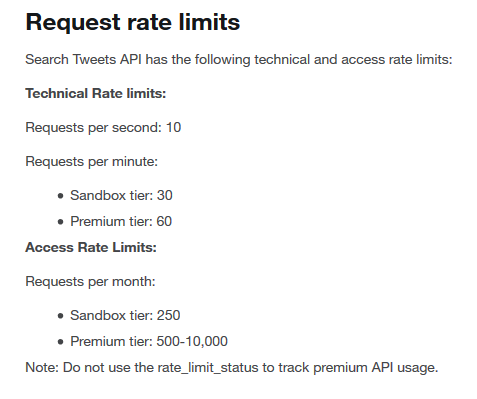

In [51]:
from IPython.display import Image
Image(filename='resources/request_rate_limits.png') 

## Precios de Contratación de los servicios de *API Premium de Twitter*

### *Twitter API Premium - Full Archive*

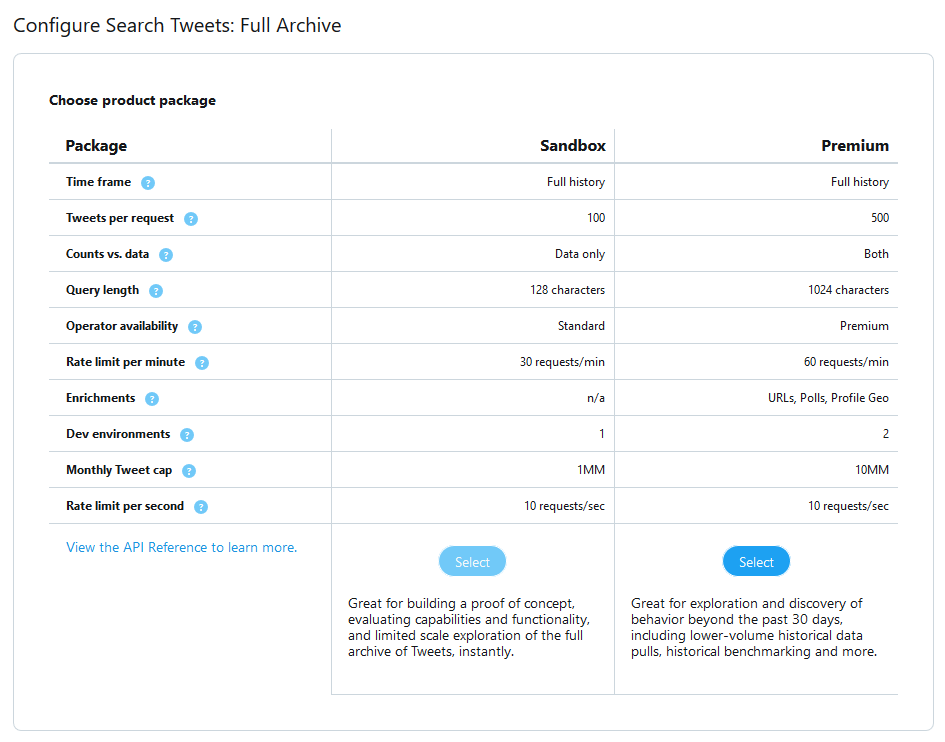

In [5]:
from IPython.display import Image
Image(filename='resources/premium_features.png') 

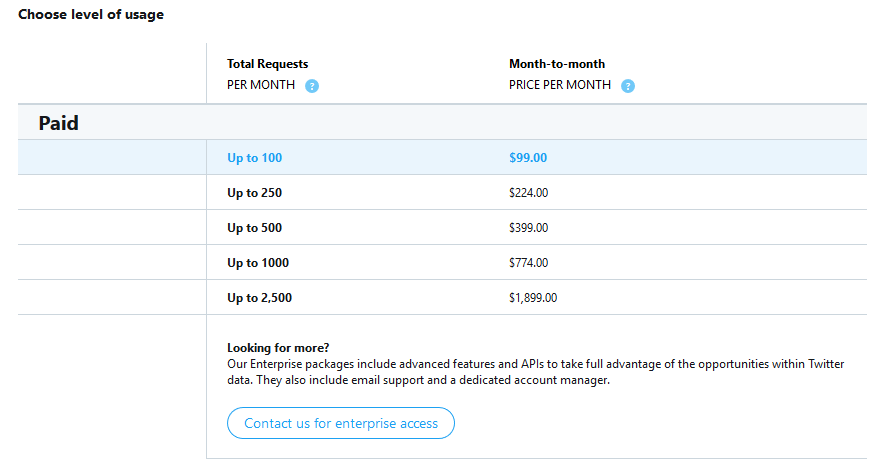

In [6]:
from IPython.display import Image
Image(filename='resources/premium_usage_level.png') 

### *Twitter API Premium - 30 Day*

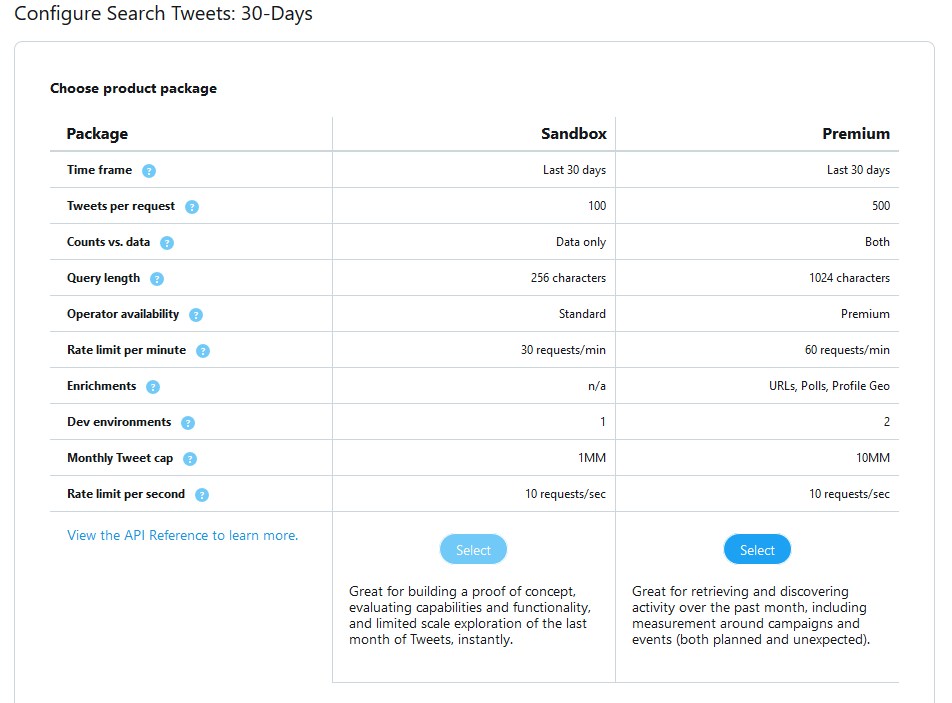

In [46]:
from IPython.display import Image
Image(filename='resources/premium_30day_features.png') 

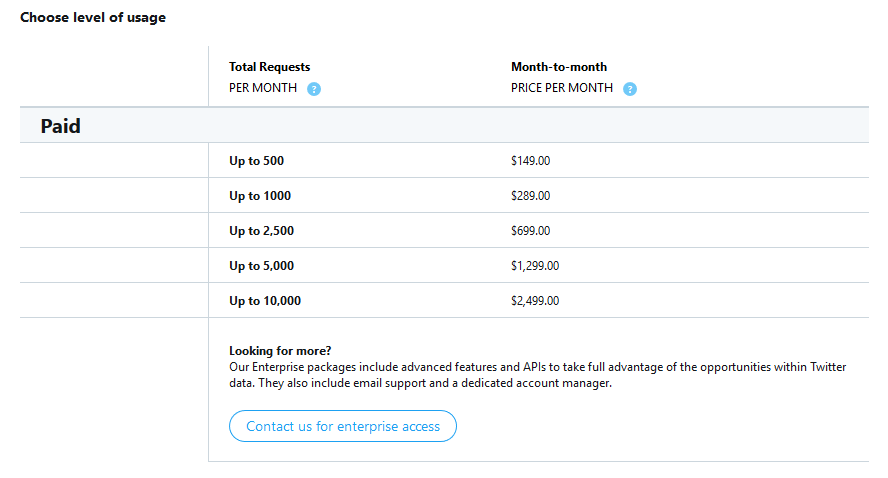

In [48]:
from IPython.display import Image
Image(filename='resources/premium_30day_usage_level.png') 

---
## *Wrapper* de la *API Premium de Twitter* con *Python*

### Obtención del Bearer Token necesario para las cabeceras de las peticiones

In [4]:
import requests

In [5]:
BASE_URL = 'https://api.twitter.com/oauth2/token'

CONSUMER_KEY = '07ypDMOmSBXdUuqBao5KrgdHq'
CONSUMER_SECRET = 'J0Psc2WO5oR5R3b4d6ek6QRqNXatxHwjQHLpyEaaND6QvlenFu'

data = {
    'grant_type': 'client_credentials',
    'client_id': CONSUMER_KEY,
    'client_secret': CONSUMER_SECRET,
}

response = requests.post('https://api.twitter.com/oauth2/token',
                         auth=(CONSUMER_KEY, CONSUMER_SECRET),
                         data=data)

In [6]:
ACCESS_TOKEN = response.json()['access_token']

In [7]:
ACCESS_TOKEN

'AAAAAAAAAAAAAAAAAAAAAO9c%2BQAAAAAAzNVpzhC5r5q2aTagB%2FX5fM1TX7g%3DRVFzhvYb5jrJW58R4sIXtGhw3fbkmhn4x7pKQ7yqBdOUTjsxSk'

### Procesamiento de la petición a la *API* y extracción de *Tweets*

In [1]:
import requests
import json

In [38]:
tweets = list()

In [39]:
URL = 'https://api.twitter.com/1.1/tweets/search/fullarchive/research.json'

In [40]:
headers = {
    'Authorization': 'Bearer ' + ACCESS_TOKEN,
    'Content-Type': 'application/json'
}

data = {
    'query': 'from:realDonaldTrump',
    'fromDate': '201801010000',
    'toDate': '201901010000',
}

data = json.dumps(data)

response = requests.post(URL, headers=headers, data=data)

json = response.json()

tweets += json['results']
next_page = json['next']

In [42]:
page_count = 3

In [43]:
for _ in range(page_count):
    data = {
        'query': 'from:realDonaldTrump',
        'fromDate': '201801010000',
        'toDate': '201901010000',
        'next': next_page
    }

    data = json.dumps(data)

    response = requests.post(URL, headers=headers, data=data)
    
    json = response.json()

    tweets += json['results']
    
    if 'next' in json:
        next_page = json['next']
    else:
        break

## Referencias

* [Search Operators Comparison between Twitter API Plans](https://developer.twitter.com/en/docs/tweets/rules-and-filtering/overview/operators-by-product)
* [Twitter API Premium Search Operators](https://developer.twitter.com/en/docs/tweets/search/guides/premium-operators)
* [Twitter API Premium - Full Archive](https://developer.twitter.com/en/pricing/search-fullarchive)
* [Twitter API Premium - 30 Day](https://developer.twitter.com/en/pricing/search-30day)

## Autor
 
Álvaro Bartolomé del Canto (alvarob96@usal.es)    
[LinkedIn](https://www.linkedin.com/in/alvarob96/)  
[GitHub](https://github.com/alvarob96)  